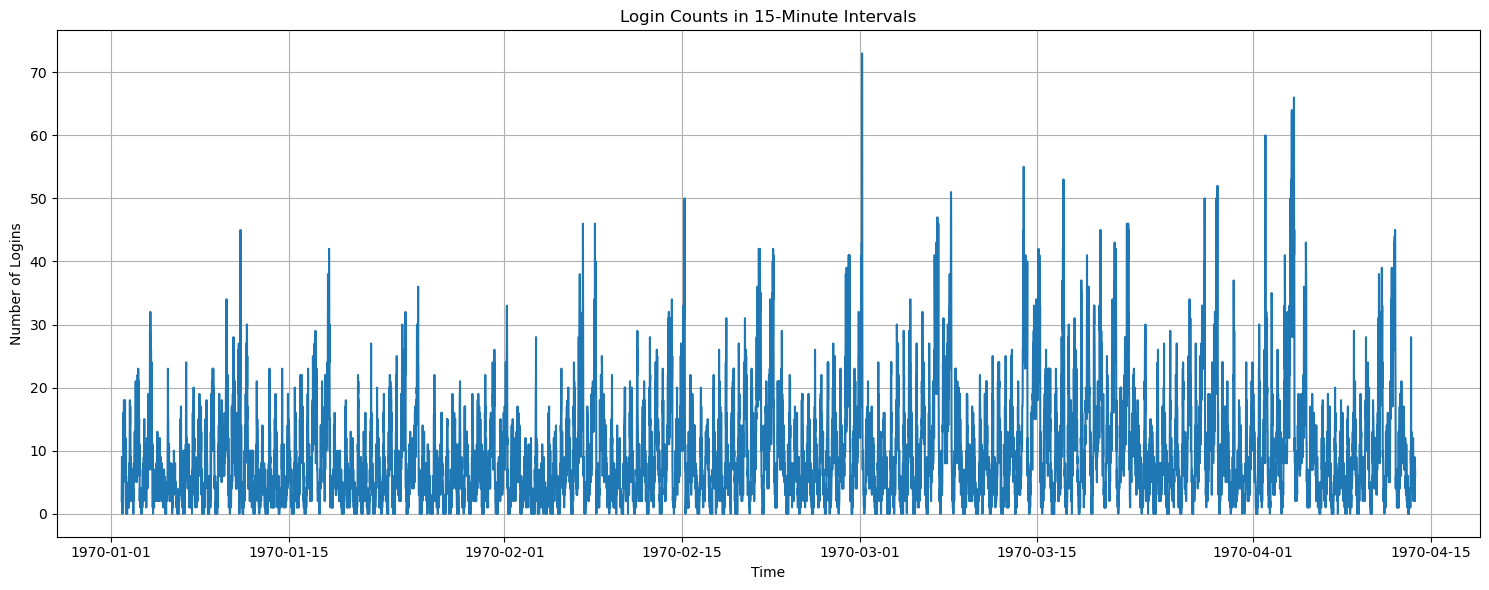

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
logins = pd.read_json("logins.json")

# Convert login_time to datetime
logins['login_time'] = pd.to_datetime(logins['login_time'])

# Set login_time as the index
logins.set_index('login_time', inplace=True)

# Resample in 15-minute intervals and count logins
login_counts = logins.resample('15T').size().to_frame(name='count')

# Plot the login counts
plt.figure(figsize=(15, 6))
plt.plot(login_counts.index, login_counts['count'])
plt.title("Login Counts in 15-Minute Intervals")
plt.xlabel("Time")
plt.ylabel("Number of Logins")
plt.grid(True)
plt.tight_layout()
plt.show()


Retention rate: 36.62%

Classification Report:

              precision    recall  f1-score   support

       False       0.81      0.82      0.81      7923
        True       0.68      0.66      0.67      4577

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



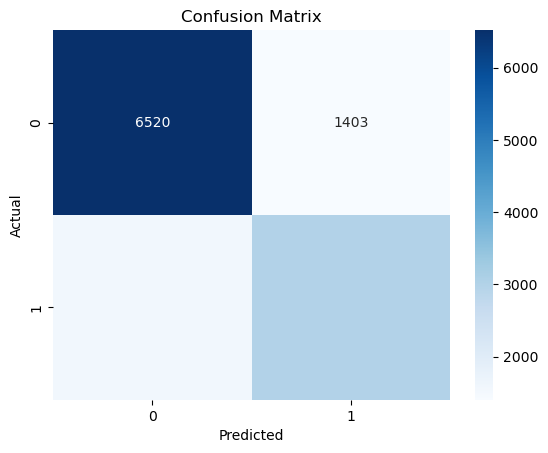

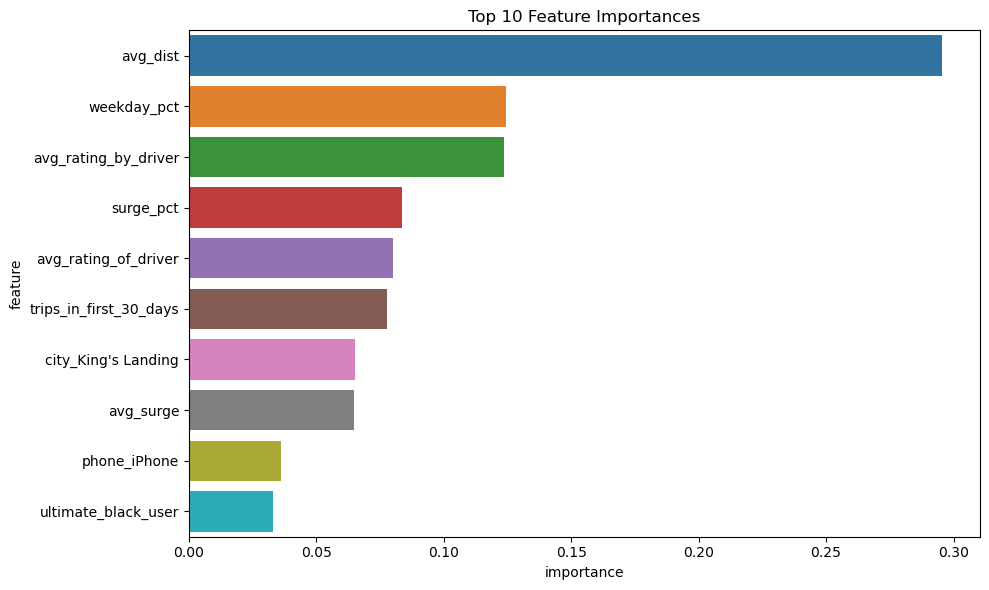

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_json("ultimate_data_challenge.json")

# Convert date fields to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Define cutoff for retention (active in last 30 days of data)
cutoff_date = df['last_trip_date'].max() - pd.Timedelta(days=30)
df['retained'] = df['last_trip_date'] > cutoff_date

# Print retention rate
retention_rate = df['retained'].mean()
print(f"Retention rate: {retention_rate:.2%}")

# Handle missing values (you can adjust this strategy)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['city', 'phone'], drop_first=True)

# Drop non-feature columns
X = df.drop(columns=['signup_date', 'last_trip_date', 'retained'])
y = df['retained']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Plot
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
